## Lecture 3: Finite Difference Method

### To be learned:

* Approximation + Stability = Convergence
* 2D elliptic equation (a.k.a. ${\rm div}(k \nabla u) = f$)
* 2D diffusion equation
    * explicit method
    * implicit method
* Application to Image Processing

## Approximation + Stability = Convergence

* Exact problem: $A u = f$
* Approximate problem: $A _h u _h = f _h$
* Approximation: $\|A _h u - f _h\| = \epsilon _h$
    - we had earlier that $\epsilon _h = O(h^2)$
* Stability (hard to prove for nontrivial equations): $\|A _h^{-1}\| \leq C$ as $h\to 0$.

* Then $\|u _h - u\| \leq C \|A _h u _h - A _h u\| = C \|f - A _h u\| = C \epsilon _h~~~$ ($=O(h^2)$ in our case)
* **Exercise**: how did we do the first transition?

### How does it work for a 1D ODE?

* Exact problem:
$
u'' = f, \quad u(0)=u(1) = 0
$

* Approximate problem:
$$
\begin{align*}
h^{-2} (u _h(x+h)-2u _h(x)+u _h(x-h)) &= f(x),
\\
u _h(0) = u _h(1) &= 0
\end{align*}
$$
on a grid with $h=1/N$

* Approximation (we need to substitute $u$ into the approximate problem):
$$
\begin{align*}
& h^{-2} (u(x+h)-2u(x)+u(x-h)) - f(x)
\\&= u''(x) - f(x) + O(h^2) = O(h^2)
\end{align*}
$$
(easy!)

* Stability... gotta work hard...

### Proving stability

* $A _h$ is symmetric <small>(disagreers will be suspected of not doing the homework! <tt>:)</tt> )</small> 
* $\|A _h^{-1}\| \leq C$ $\Leftrightarrow$ $|\lambda _\min(A _h)| \geq C^{-1}$, where $\lambda _\min$ is the eigenvalue with the smallest absolute value

* **Exercise:** Do some math:
    - **Prove** that $v^{(k)}(x) := \sin(k \pi x)$ is an eigenvector
    - **Find** its eigenvalue $\lambda^{(k)}$
    - What is an easy way to **prove** that $v^{(k)}$ are linearly independent for $k=1,...,N-1$?
    - Can you now **prove** that $\|A _h^{-1}\| \leq C$?

## 2D Elliptic Equation

* A general diffusion equation is
$$
{\rm div}(k\, \nabla u) = f
$$
* Here $k$ is typically a scalar **diffusion coefficient**
* Sometimes $k$ is a matrix (**diffusion tensor**)

## Discretization

* If $k={\rm const}$ then we know how to do it:
$$
{\rm div}(k\, \nabla u) = k \Delta u = k \Delta _h u
$$

<img src="fig/stencil.png">

* In a tabular form we write it as
$$
k \Delta _h \sim \frac{1}{h^2} \begin{pmatrix} 0 & k & 0 \\ k & -4k & k \\ 0 & k & 0 \end{pmatrix}
$$

* If $k\ne{\rm const}$ then we shall be more careful:
$$\scriptstyle
{\rm div}(k\, \nabla u)(x,y) = \left(\begin{array}{ccc} 0 & k(x,y-h/2) & 0 \\ k(x-h/2,y) & \text{guess} & k(x+h/2,y) \\ 0 & k(x,y+h/2) & 0 \end{array}\right)
$$

* Let's see how it works in 1D:
    - $k(x+h/2) u'(x+h/2) = k(x+h/2) (u(x+h)-u(x)) h^{-1} + O(h^2)$ (**Exercise**: prove)
    - Likewise for $k(x-h/2) u'(x-h/2)$
    - Hence
    $$\textstyle
    \frac{k(x+h/2) (u(x+h/2)-u(x)) - k(x-h/2) (u(x)-u(x-h))}{h^2} = (k u')'+ O(h^2)    
    $$
* **Exercise**: work it out in 2D
* **Exercise**: attempt to work it out in 2D when $k=k(x)$ is a 2x2 matrix

### Nicer notation

* If we denote the FD operators $D _+ u = u(x+h) - u(x)$ and $D _- u = u(x) - u(x-h)$, then

$$
{\rm div}(k\nabla u)(x) = D _- \big(k(x+h/2) \, D _+ u(x)\big)
$$

## Time-dependent: 2D diffusion

$$
\begin{align*}
u _t &= k (u _{xx} + u _{yy})\\
u| _{t=0} &= u _0 \\
u| _{\Gamma} &= 0
\end{align*}
$$

* Approximation is typically easy: just replace with discrete operators:

$$
\begin{align*}
\frac{u _h(t+\tau)-u _h(t)}{\tau} &= k \Delta _h u _h(t)
\qquad \text{for }(x,y)\in\Omega
\\
u _h| _{t=0} &= u _0 \\
u _h| _{\Gamma} &= 0
\end{align*}
$$

* This is an **explicit** discretization: we don't need to invert $\Delta_h$ (also called the "forward difference scheme")

* **Exercise:** Order of approximation: $O(\tau + h^2)$
* Stability: again not easy

### Stability

* We want the result in the form $\|u _h\| \leq C \|u _0\|$
* We know that $\|u(t)\|$ decreases in time (energy diffuses $\Rightarrow$ not growing)
* Hence we require $\|u _h(t+\tau)\| \leq \|u _h(t)\|$
* In other words, eigenvalues of $I + \tau k\Delta _h$ are between $-1$ and $1$
* **Exercise:** derive the stability condition on $\tau$ (and $h$ and $k$)

### So that you know: Implicit discretization
$$
\begin{align*}
\frac{u _h(t+\tau)-u _h(t)}{\tau} &= k \frac{\Delta _h u _h(t+\tau) + \Delta _h u _h(t)}{2}
\qquad \text{for }(x,y)\in\Omega
\\
u _h| _{t=0} &= u _0 \\
u _h| _{\Gamma} &= 0
\end{align*}
$$

* This is called the "Crank-Nicolson" scheme

* Here we do need to invert $\Delta _h$:
$$
u _h(t+\tau) = \big(I - {\textstyle \frac{1}{2}} \tau \Delta _h\big)^{-1} \big(I + {\textstyle \frac{1}{2}} \tau \Delta _h\big) u _h(t)
$$

* **Exercise**: approximation error is $O(\tau^2 + h^2)$

* **Exercise**: stability is unconditional (i.e., always stable!)

* If we can efficiently invert $(I - \frac{1}{2}  \tau \Delta _h)^{-1}$ then it is better than the explicit!

## Cool application: Image processing

* Let's solve
$$
\begin{align*}
\frac{u _h(t+\tau)-u _h(t)}{\tau} &= k \Delta _h u _h(t)
\qquad \text{for }(x,y)\in\Omega
\\
u _h| _{t=0} &= u _0 \\
u _h| _{\Gamma} &= u _0| _{\Gamma}
\end{align*}
$$
Here $u _0(x,y)$ is the image we want to process
<img src="fig/photo_noisy.png">

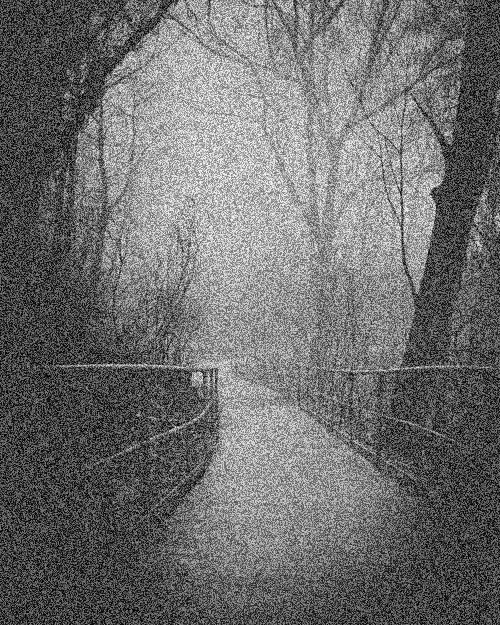

<function __main__.set_cursor>

In [1]:
from IPython.html.widgets import interact
from PIL import Image
from numba import autojit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
img=Image.open('fig/photo.png')
imarray_orig=np.array(img)
img=Image.open('fig/photo_noisy.png')
imarray=np.array(img)
imarray_noisy=imarray;

import PIL
from IPython.display import display, Image
from io import BytesIO

def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png', retina=True))

import pyamg
A = sp.sparse.csr_matrix(pyamg.gallery.laplacian.poisson(imarray.shape))

imarray = imarray.astype(float)
vec = imarray.reshape(-1,1);
for iter in range(1, 20):
    vec += -0.1*A*vec;
imarray = vec.reshape(imarray.shape);
imarray_blur = imarray.astype(dtype="uint8")

def set_cursor(i):
    if i==0:
        display_img_array(imarray_orig)
    elif i==1:
        display_img_array(imarray_noisy.astype(dtype="uint8"))
    else:
        display_img_array(imarray_blur)

interact(set_cursor, i=(0, 2, 1))

#display_img_array(imarray_orig)
#display_img_array(imarray_noisy.astype(dtype="uint8"))
#display_img_array(imarray_blur)

In [2]:
imarray.shape

(625L, 500L)

### "Anisotropic" diffusion

* Let's solve
$$
\begin{align*}
u' &= {\rm div} (k \nabla u)
\qquad \text{for }(x,y)\in\Omega
\\
u| _{t=0} &= u _0 \\
u| _{\Gamma} &= u _0| _{\Gamma}
\end{align*},
$$
where $k=k(\nabla u) = 1/\sqrt{1+|\nabla u|^2}$ ($|v|$ is the length of $v$)

* We use the explicit finite difference method:

* We discretize it with $\tau=0.25$ below:

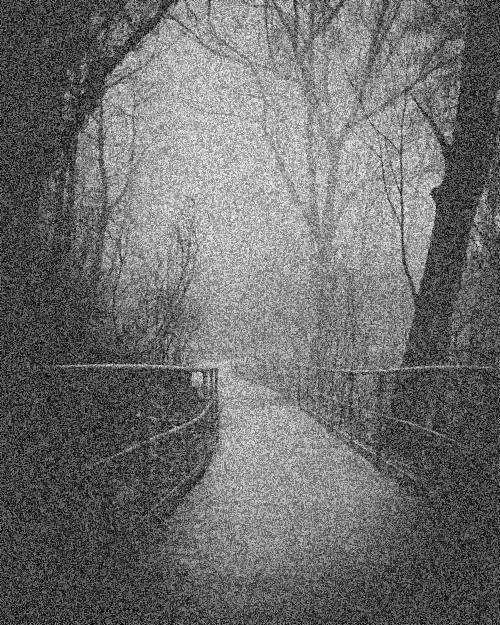

In [5]:
imarray = imarray_noisy.astype(float)

def time_step(imarray):
    new_imarray = imarray;
    for i in range(1,imarray.shape[0]-2):
        for j in range(1,imarray.shape[1]-2):
            dx1 = (imarray[i+1,j]-imarray[i,j]);
            dx0 = (imarray[i,j]-imarray[i-1,j]);
            dx = (dx1+dx0)/2;
            dy1 = (imarray[i,j+1]-imarray[i,j]);
            dy0 = (imarray[i,j]-imarray[i,j-1]);
            dy = (dy0+dy1)/2;
            new_imarray[i,j] += 0.25*(dx1/np.sqrt(1+dx1*dx1+dy*dy)-dx0/np.sqrt(1+dx0*dx0+dy*dy));
            new_imarray[i,j] += 0.25*(dy1/np.sqrt(1+dy1*dy1+dx*dx)-dy0/np.sqrt(1+dy0*dy0+dx*dx));
    imarray = new_imarray;

time_step = autojit(time_step)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

num_steps = 20
num_images = 10
imarray_denoise = []
for outer_iter in xrange(num_images): # how many images will be produced
    for iter in xrange(num_steps): # how many time steps to do for each image
        time_step(imarray)
    imarray_denoise.append(imarray.astype(dtype="uint8"))
        #plt.imshow(imarray_denoise)
        #display_img_array(imarray_denoise)

def set_cursor(i):
    display_img_array(imarray_denoise[i])
    #display_img_array(imarray_orig)

interact(set_cursor, i=(0, num_images-1, 1))

## To install the JSAnimation library

In order to view animation of noise removal you need to install JSAnimation library. The easiset way to do this is to run from command line:

```
conda install --channel https://conda.binstar.org/IOOS jsanimation
```

Win-64 users:
```
conda install --channel https://conda.binstar.org/melund JSAnimation
```

You can explore all available packages of that library by running:

```
binstar search -t conda jsanimation
```


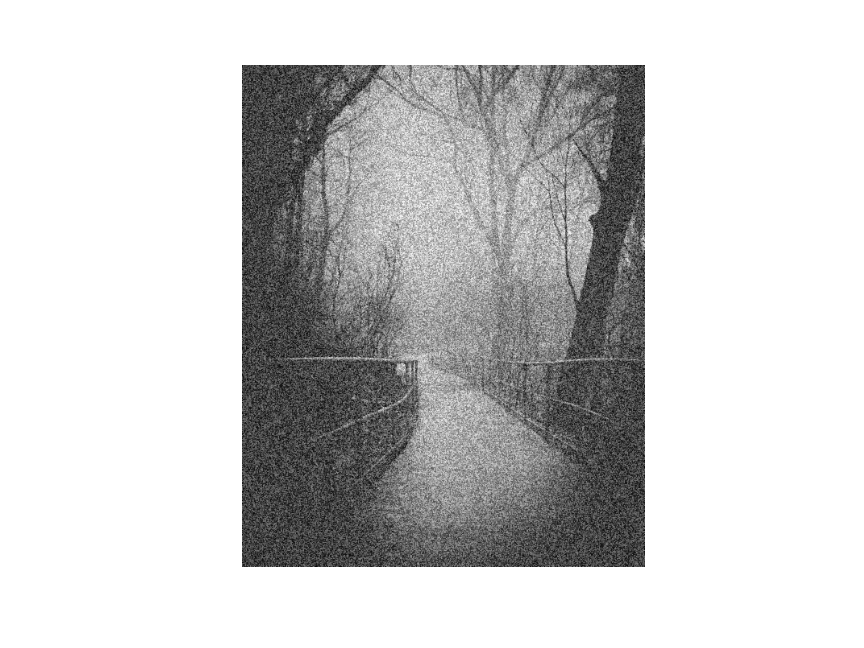
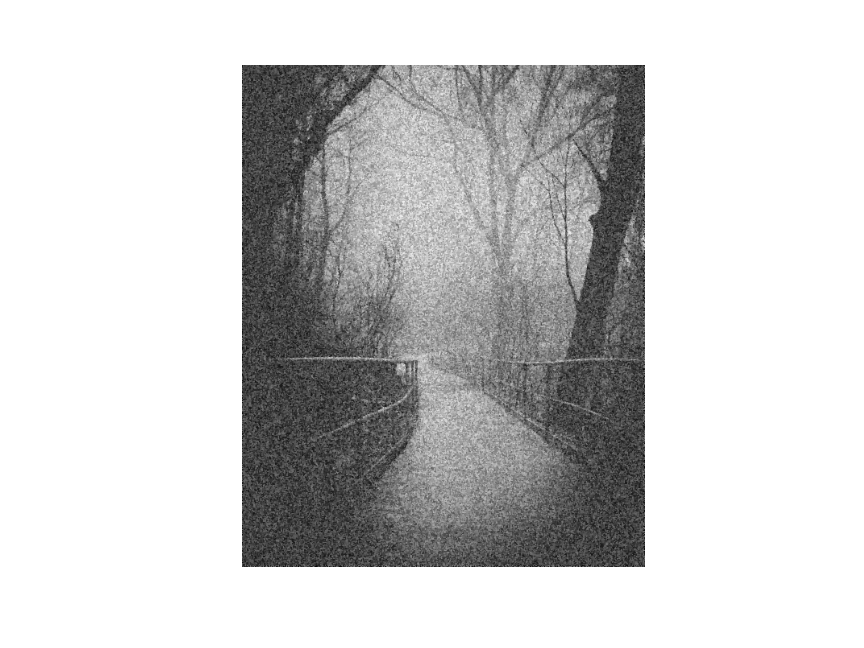
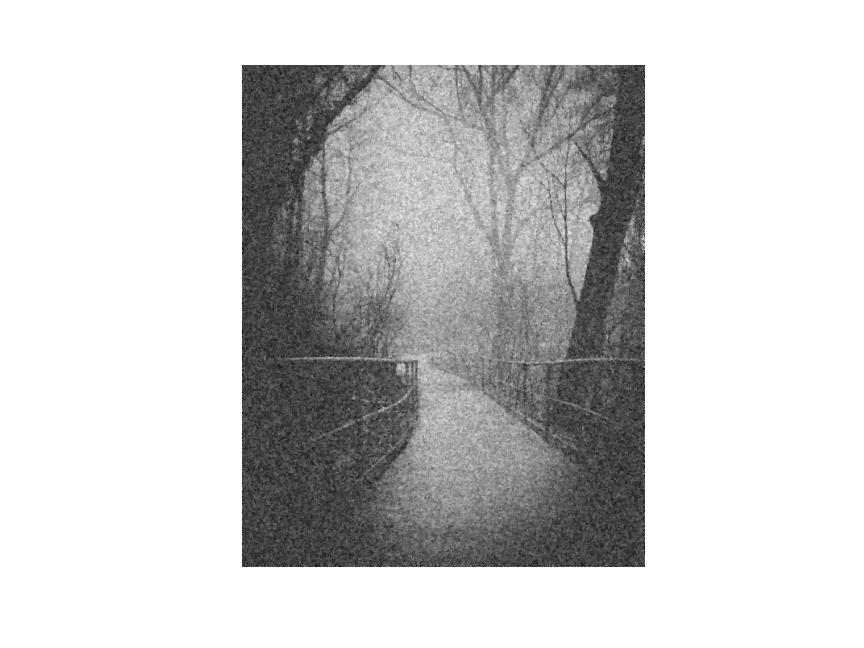
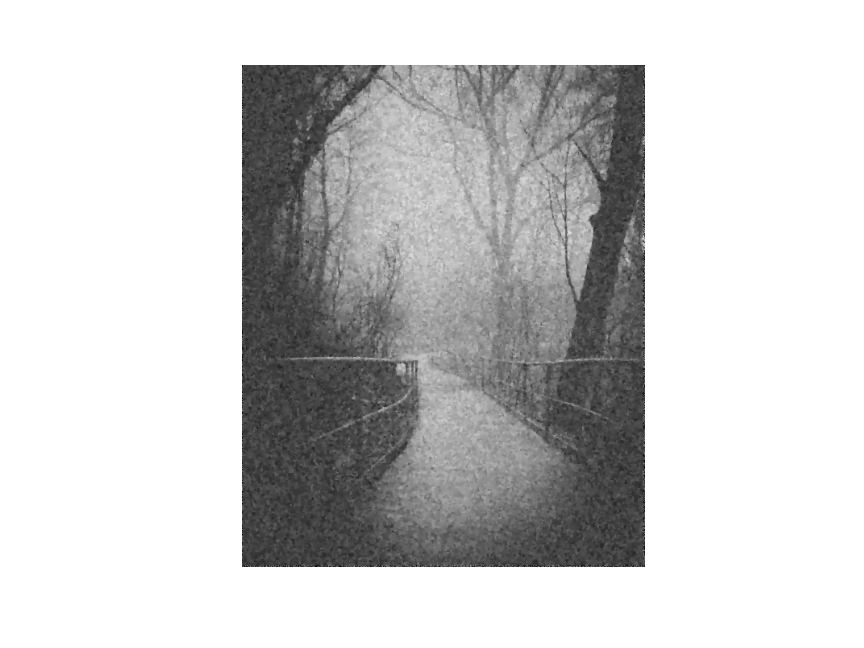
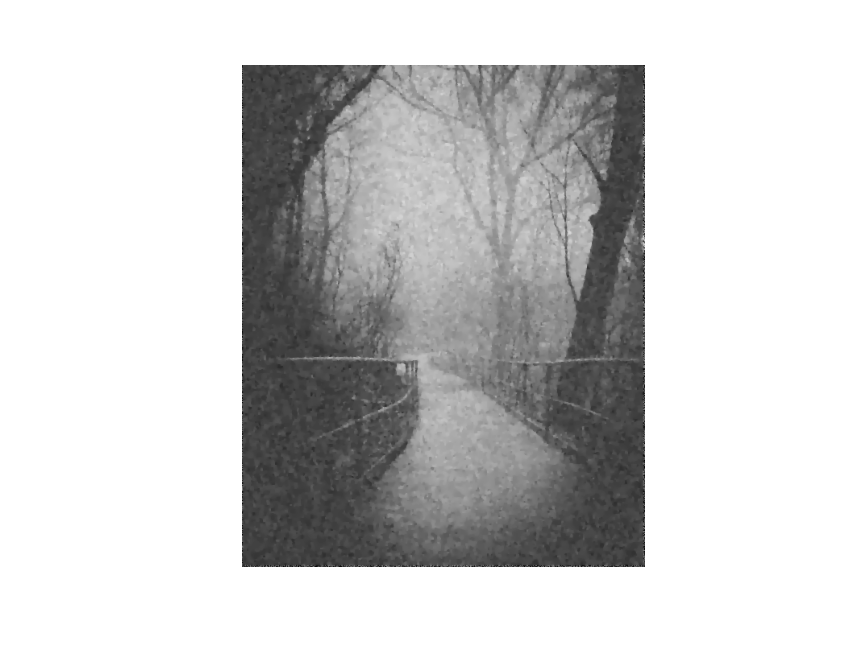
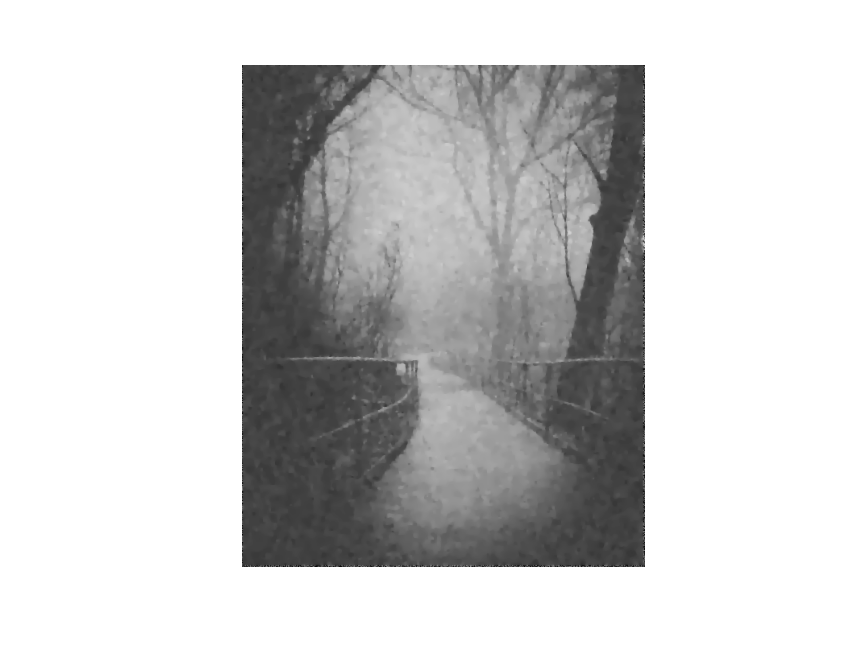
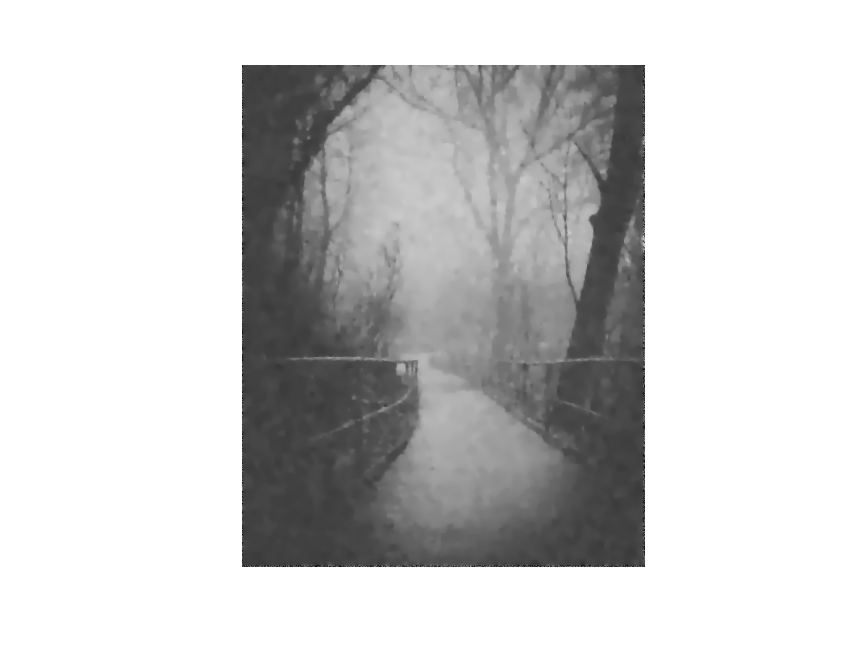
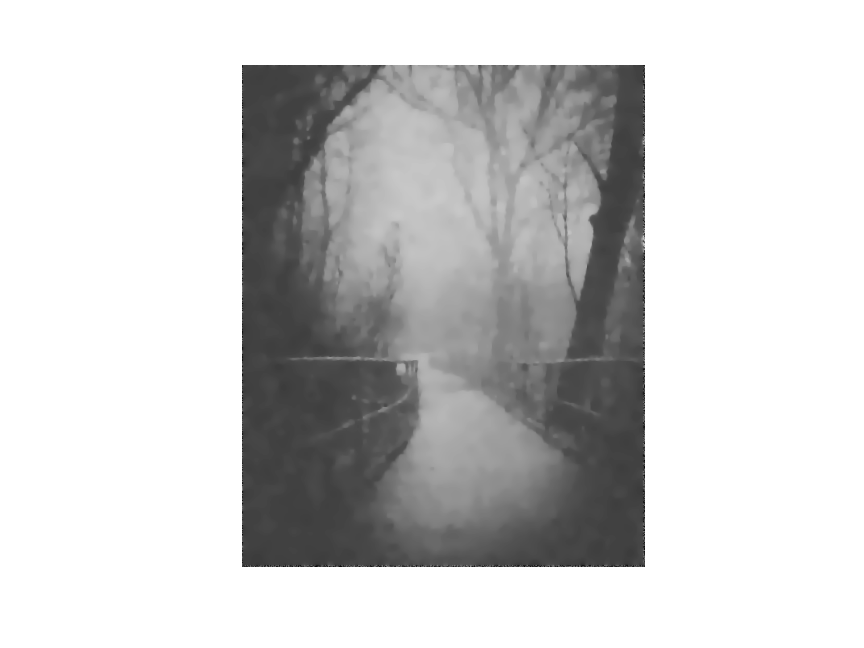
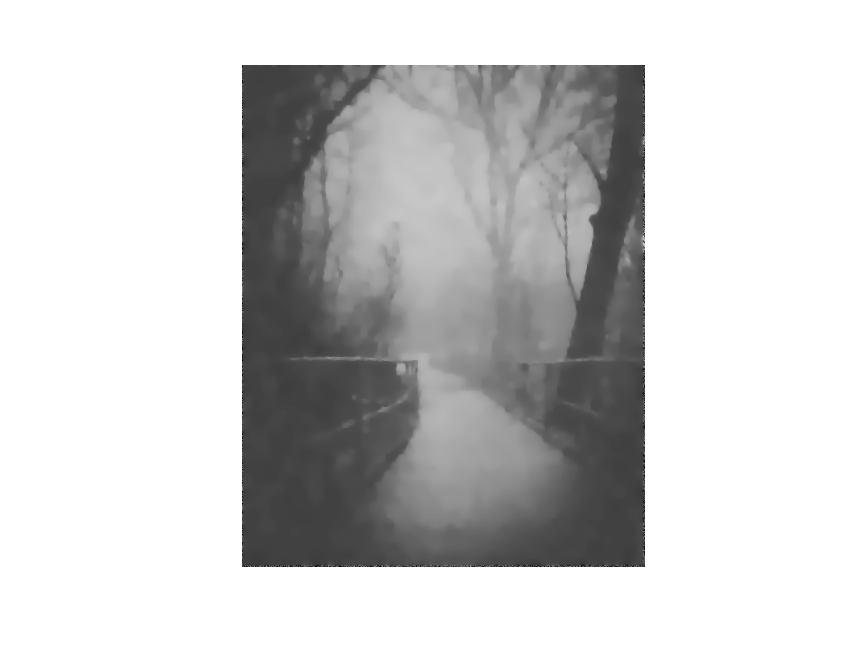
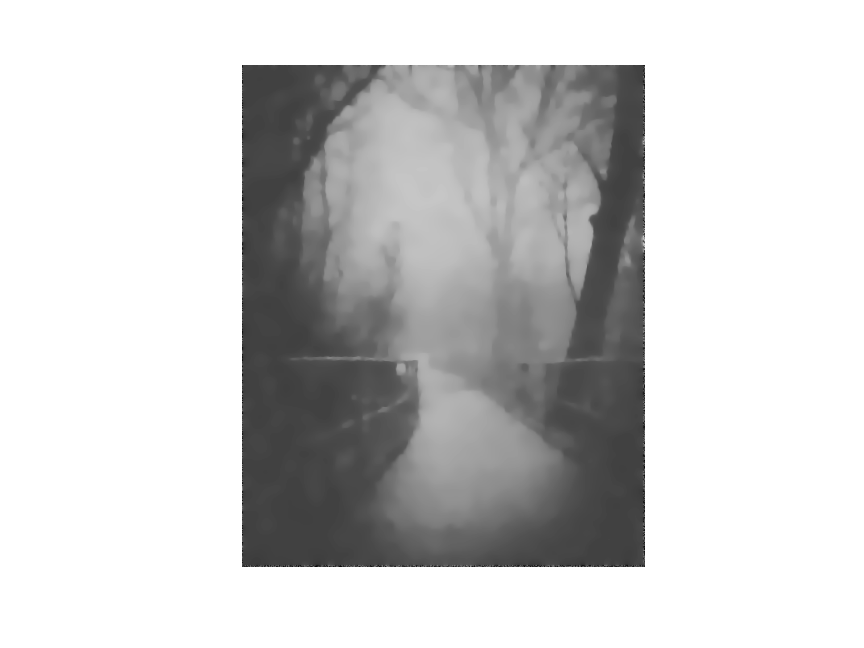

In [6]:
from JSAnimation import IPython_display

fig = plt.figure(figsize=(12, 9))
plt.axis('off')
im = plt.imshow(imarray_denoise[0], cmap='gray')

def animate(i):
    im.set_data(imarray_denoise[i])
    return [im]

def init():
    im.set_data(imarray_denoise[0])
    return im

animation.FuncAnimation(fig, animate, frames=num_images, 
                        init_func=init,interval=300, blit=False)

## Advantages of the Finite Difference Method:

* Simple, easy to code

## Disadvantages of the Finite Difference Method:

* Works nicely only in simple domains (line segment, square)
    * Typical applications:
    * Finance: p(t,x): probability density that a stock costs $x$ at time $t$; domain: $x _{\min} \leq x \leq x _{\max}$
    * Image processing: domain is a rectangle
    * Problems in infinite domains, after we truncate the domain to a square (e.g., in quantum mechanic calculations)
* Adaptivity (non-uniform grids) is hard
* Stability is not granted
* Some desired properties (of the original problem) is hard to achieve, e.g., ${\rm div} _h \nabla _h = \Delta _h$, $\nabla _h {\rm div} _h = 0$, etc.

## Finite Volume Method

Idea:

* Start with a physical law
${\rm div}(k\nabla u) = f$
* Divide onto cells $\Omega = \bigcup _i \Omega _i$
* (Idea: We want to assume that $u$ is constant in each cell. Then we just need one equation per cell (to find that constant). But we are not going to assume this yet.)
* Integrate the equation over the cell:
$$
\int _{\Omega _i} {\rm div}(k\nabla u)
= \int _{\partial\Omega _i} k\nabla u\cdot n
= \int _{\Omega _i} f
$$
* $k\nabla u$ has a clear meaning here: it is the **flux** through $\partial\Omega _i$.
* It hence can be approximated by finite differences.
* The discretization will hence look like
$$
\begin{align*}
\sum _{\Omega _j {\rm \ adj.to\ }\Omega _i} \Big(
&
{\rm Area}(\Omega _i\cap\Omega _j)
\\&
k \frac{\big((u| _{\Omega _j})-(u| _{\Omega _i})\big)}{\text{distance between centers of $\Omega _i$ and $\Omega _j$}}
\Big)
\end{align*} = 
$$
$$
=\int _{\Omega _i} f
$$


##### Questions?
